In [1]:
# import libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import sklearn as sk
from math import sqrt
import scipy.stats as stats
from sklearn import preprocessing
import arviz as az
import seaborn as sns; sns.set()
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import warnings
from sklearn.covariance import EllipticEnvelope
warnings.filterwarnings('ignore')

In [2]:
# step 1 read the data

# read the original medical insurance data
original_data = pd.read_csv("Medical_Insurance_Cost.csv")
original_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# create a copy of the medical insurance data
data = original_data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# step 2: deal with missing value

# basic playing around with the data
data['age'].max() # data['age'].min()
data['charges'].min() # data['charges'].max()
# check the null value or missing value from the data
data.shape # (1338, 7)
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [5]:
# rescaling the age and BMI variables
data["age_scaled"] = preprocessing.scale(data.age.values)
data["bmi_scaled"] = preprocessing.scale(data.bmi.values)
data["children_scaled"] = preprocessing.scale(data.children.values)
data["charges_log"] = np.log(data['charges'])

# mapping the sex male is 0, female is 1.
data['sex'] = data['sex'].map({'male':1,'female': 0})
# replace the value of the smoker, smoker is 1, nonsmoker is 0.
data['smoker'] = np.where(data['smoker'] == 'yes', 1, 0)

data.head()

,age,sex,bmi,children,smoker,region,charges,age_scaled,bmi_scaled,children_scaled,charges_log
0,19,0,27.900,0,1,southwest,16884.92400,-1.438764,-0.453320,-0.908614,9.734176
1,18,1,33.770,1,0,southeast,1725.55230,-1.509965,0.509621,-0.078767,7.453302
2,28,1,33.000,3,0,southeast,4449.46200,-0.797954,0.383307,1.580926,8.400538
3,33,1,22.705,0,0,northwest,21984.47061,-0.441948,-1.305531,-0.908614,9.998092
4,32,1,28.880,0,0,northwest,3866.85520,-0.513149,-0.292556,-0.908614,8.260197


In [6]:
# seperate the variables and the target, X are obervations including age,sex,bmi,children,smoker,region
# the target (dependent variable is 'charges')
y = data['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# step 3: deal with outliers from the data and no outliers
data.describe()

,age,sex,bmi,children,smoker,charges,age_scaled,bmi_scaled,children_scaled,charges_log
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,-1.853691e-16,-1.869041e-16,2.721623e-17,9.098659
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,1.000374e+00,1.000374e+00,1.000374e+00,0.919527
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,-1.509965e+00,-2.412011e+00,-9.086137e-01,7.022756
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,-8.691547e-01,-7.164063e-01,-9.086137e-01,8.463853
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,-1.474046e-02,-4.320880e-02,-7.876719e-02,9.146552
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,8.396738e-01,6.611572e-01,7.510793e-01,9.719558
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.765289e+00,3.685522e+00,3.240619e+00,11.063045


### 1. Is the data evenly distributed on the four regions?

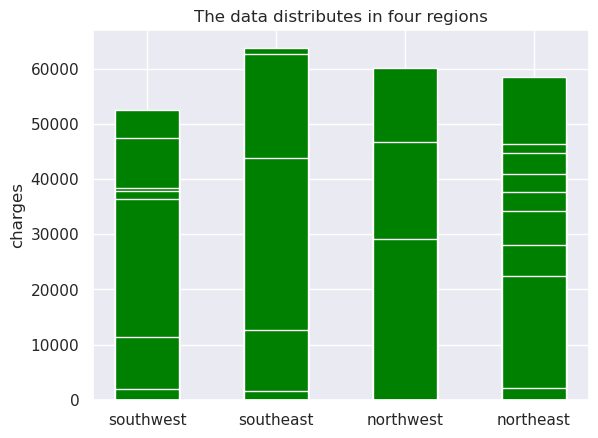

In [8]:
# step 4: analysis the variables
# get the region data
data['region'].unique()  # ['southwest', 'southeast', 'northwest', 'northeast']
# axis setup
fig=plt.figure()
axis=fig.add_subplot(111)
# set some title
plt.title("The data distributes in four regions")
plt.ylabel("charges")
# show in bar plot
plt.bar(data['region'],y,color="green",width=0.5)  
plt.show()

### 2. plot the age and bmi variables

<AxesSubplot:xlabel='charges_log', ylabel='Density'>

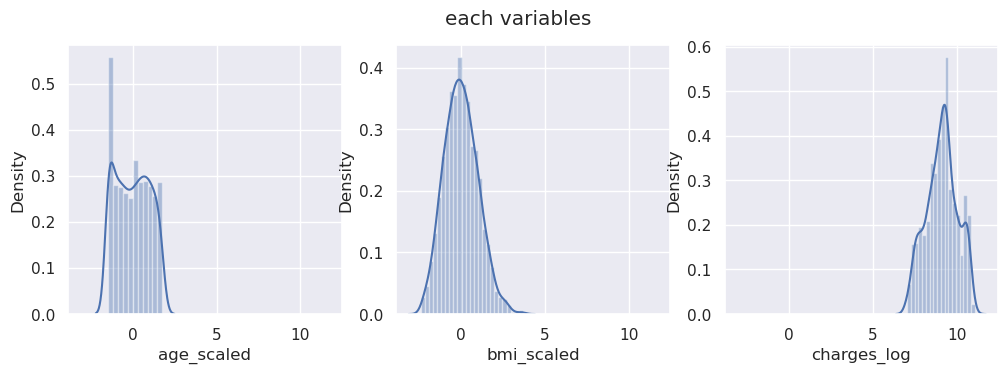

In [9]:
# plot the varialbes check whether they are normal distribution or not.
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12,3.5))
fig.suptitle('each variables')
sns.distplot(data.age_scaled,ax=axes[0])
sns.distplot(data.bmi_scaled,ax=axes[1])
sns.distplot(data.charges_log,ax=axes[2])

<AxesSubplot:xlabel='charges', ylabel='Density'>

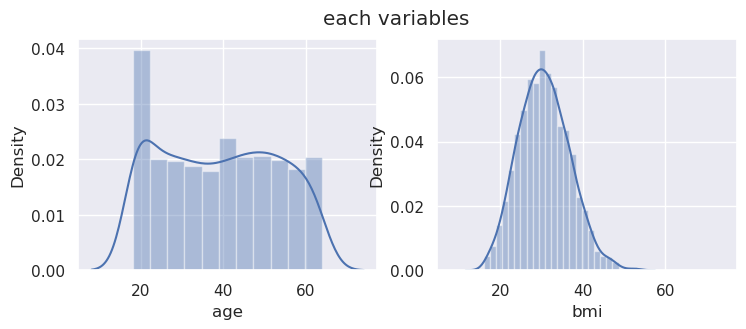

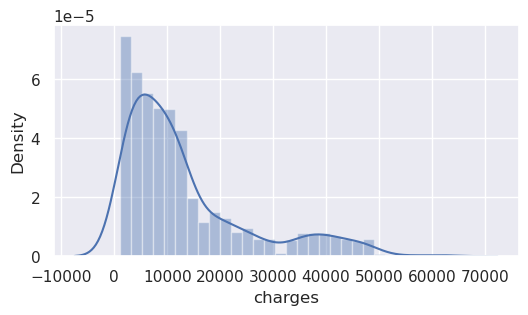

In [10]:
# comparing with original data 
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8.5,3))
fig.suptitle('each variables')
sns.distplot(data.age,ax=axes[0])
sns.distplot(data.bmi,ax=axes[1])

# set all the numerical variables into normal distribution using Log transformation
fig, axes = plt.subplots(1,1,sharex=True, figsize=(6,3))
sns.distplot(data.charges,ax=axes)

<AxesSubplot:xlabel='children_scaled', ylabel='Density'>

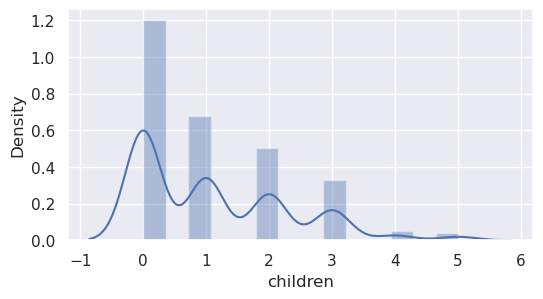

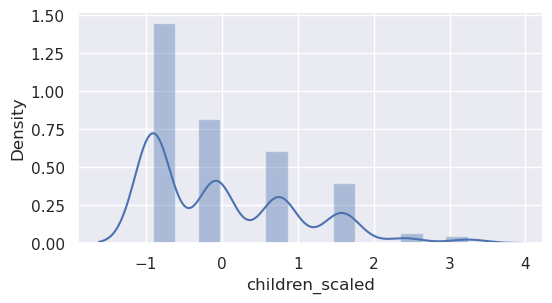

In [11]:
# analysis the children variables 
fig, axes = plt.subplots(1,1,sharex=True, figsize=(6,3))
sns.distplot(data.children,ax=axes)
fig, axes = plt.subplots(1,1,sharex=True, figsize=(6,3))
sns.distplot(data.children_scaled,ax=axes)

<AxesSubplot:xlabel='sex', ylabel='Density'>

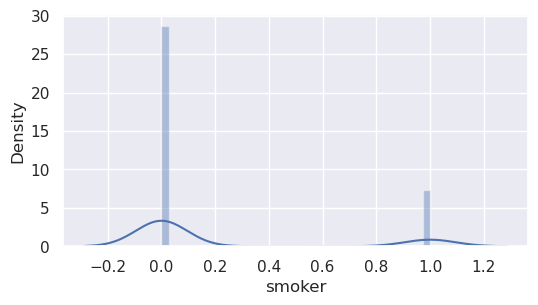

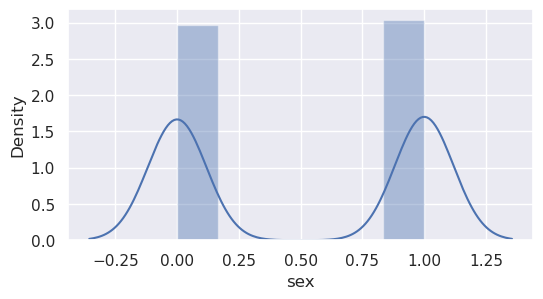

In [12]:
fig, axes = plt.subplots(1,1,sharex=True, figsize=(6,3))
sns.distplot(data.smoker,ax=axes)

fig, axes = plt.subplots(1,1,sharex=True, figsize=(6,3))
sns.distplot(data.sex,ax=axes)

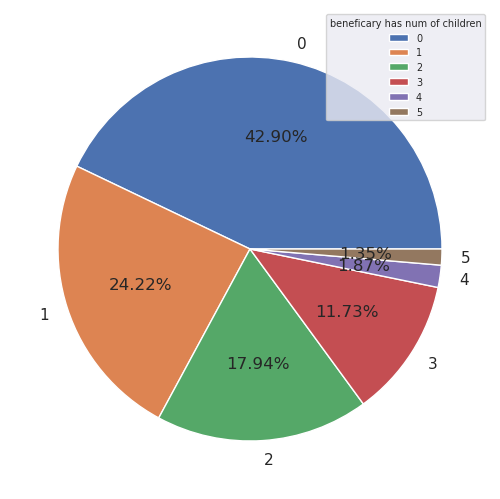

In [13]:
# use a pie plot to show the ratio of the beneficary has the number of children
data['children'].unique() # 0,1,2,3,4,5
data['children'].min() # 0
data['children'].max() # 5

d0=(data['children']== 0 ).sum()
d1=(data['children']== 1 ).sum()
d2=(data['children']== 2 ).sum()
d3=(data['children']== 3 ).sum()
d4=(data['children']== 4 ).sum()
d5=(data['children']== 5 ).sum()
datalist= [d0,d1,d2,d3,d4,d5]

# pick up each product name from dataframe
names= [0,1,2,3,4,5]
# figure and axis setup
fig=plt.figure()
axis=fig.add_axes([0,0,1,1])

# data shows in pie plot
plt.pie(datalist,labels = names,autopct='%1.2f%%')
plt.legend(title = "beneficary has num of children",loc=1,fontsize ='xx-small',title_fontsize=7)  #2means upper left
plt.show()

#### 3.Can we plot the regions with oldest population and highest charges?

In [14]:
data['age'].max() # the minimum age of the beneficiary is 64
# as we known the older beneficiary is 64, so group them to a new data
old_data = pd.DataFrame(data['age'])
old_data = old_data.query('age == 64') 
old_data['charges'] =data['charges']
old_data['region'] =data['region']
old_data = old_data.reset_index(drop=True)
old_data.shape # 22
old_data.loc[old_data['charges']==52590.82939] # the highest charge
old_data.head()

,age,charges,region
0,64,30166.61817,northwest
1,64,47291.05500,southwest
2,64,14901.51670,northeast
3,64,47928.03000,southwest
4,64,13822.80300,southwest


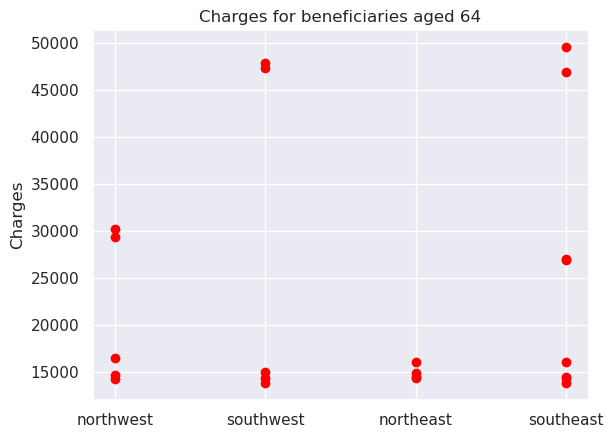

In [15]:
# Read four regions with relative charges display it using a scatter plot.
# set the independent variable 'region' and target'charges'
y = old_data['charges']
X = old_data['region']

# plot the points
plt.scatter(X,y,c="red")
plt.title("Charges for beneficiaries aged 64")
plt.ylabel("Charges")
plt.grid("True")
plt.show()

### 4.Are any relevant correlation between the ratio of multiple quantitative variables; such as age/bmi vs charges/children?

1). Are any relevant correlation between age and BMI?

In [16]:
# create a copy of the data with all the scaling variables because after preprocessing they are normal distribution
df = data.iloc[:,-4:]
# create a dataframe only contains age and bmi values
df_age_bmi = pd.DataFrame(df[['age_scaled','bmi_scaled']])
X = df_age_bmi['age_scaled']
y = df_age_bmi['bmi_scaled']

# it shows the correlation between age and bmi
cor_age_bmi = stats.pearsonr(X,y) # (cor: 0.10927188154853518, p:6.194289065051802e-05)
# another method to have a look the correlation between age and bmi
np.corrcoef(X,y)

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

2).Are any relevant correlation between charges/children?

In [17]:
# create a dataframe only contains age and bmi values
df_children_charges = pd.DataFrame(df[['children_scaled','charges_log']])
X = df_children_charges['children_scaled']
y = df_children_charges['charges_log']

# it shows the correlation between age and bmi
cor_age_bmi2 = stats.pearsonr(X,y) # (0.16133634204640512, 2.9406906576115914e-09)
np.corrcoef(X,y)

array([[1.        , 0.16133634],
       [0.16133634, 1.        ]])

In [31]:
df2

,age,sex,bmi,children,smoker,charges,region,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,southwest,0,0,0,1
1,18,1,33.770,1,0,1725.55230,southeast,0,0,1,0
2,28,1,33.000,3,0,4449.46200,southeast,0,0,1,0
3,33,1,22.705,0,0,21984.47061,northwest,0,1,0,0
4,32,1,28.880,0,0,3866.85520,northwest,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,northwest,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,northeast,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,southeast,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,southwest,0,0,0,1


3). all the variables relationship between each other 

In [18]:
#it shows all the variables relationship between each other 
df2 = data.iloc[:,:5]
df2['charges'] = data['charges']

cor_all = df2.corr()
print(cor_all.charges)
cor_all

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


3). showing all the relationship with multiple variables

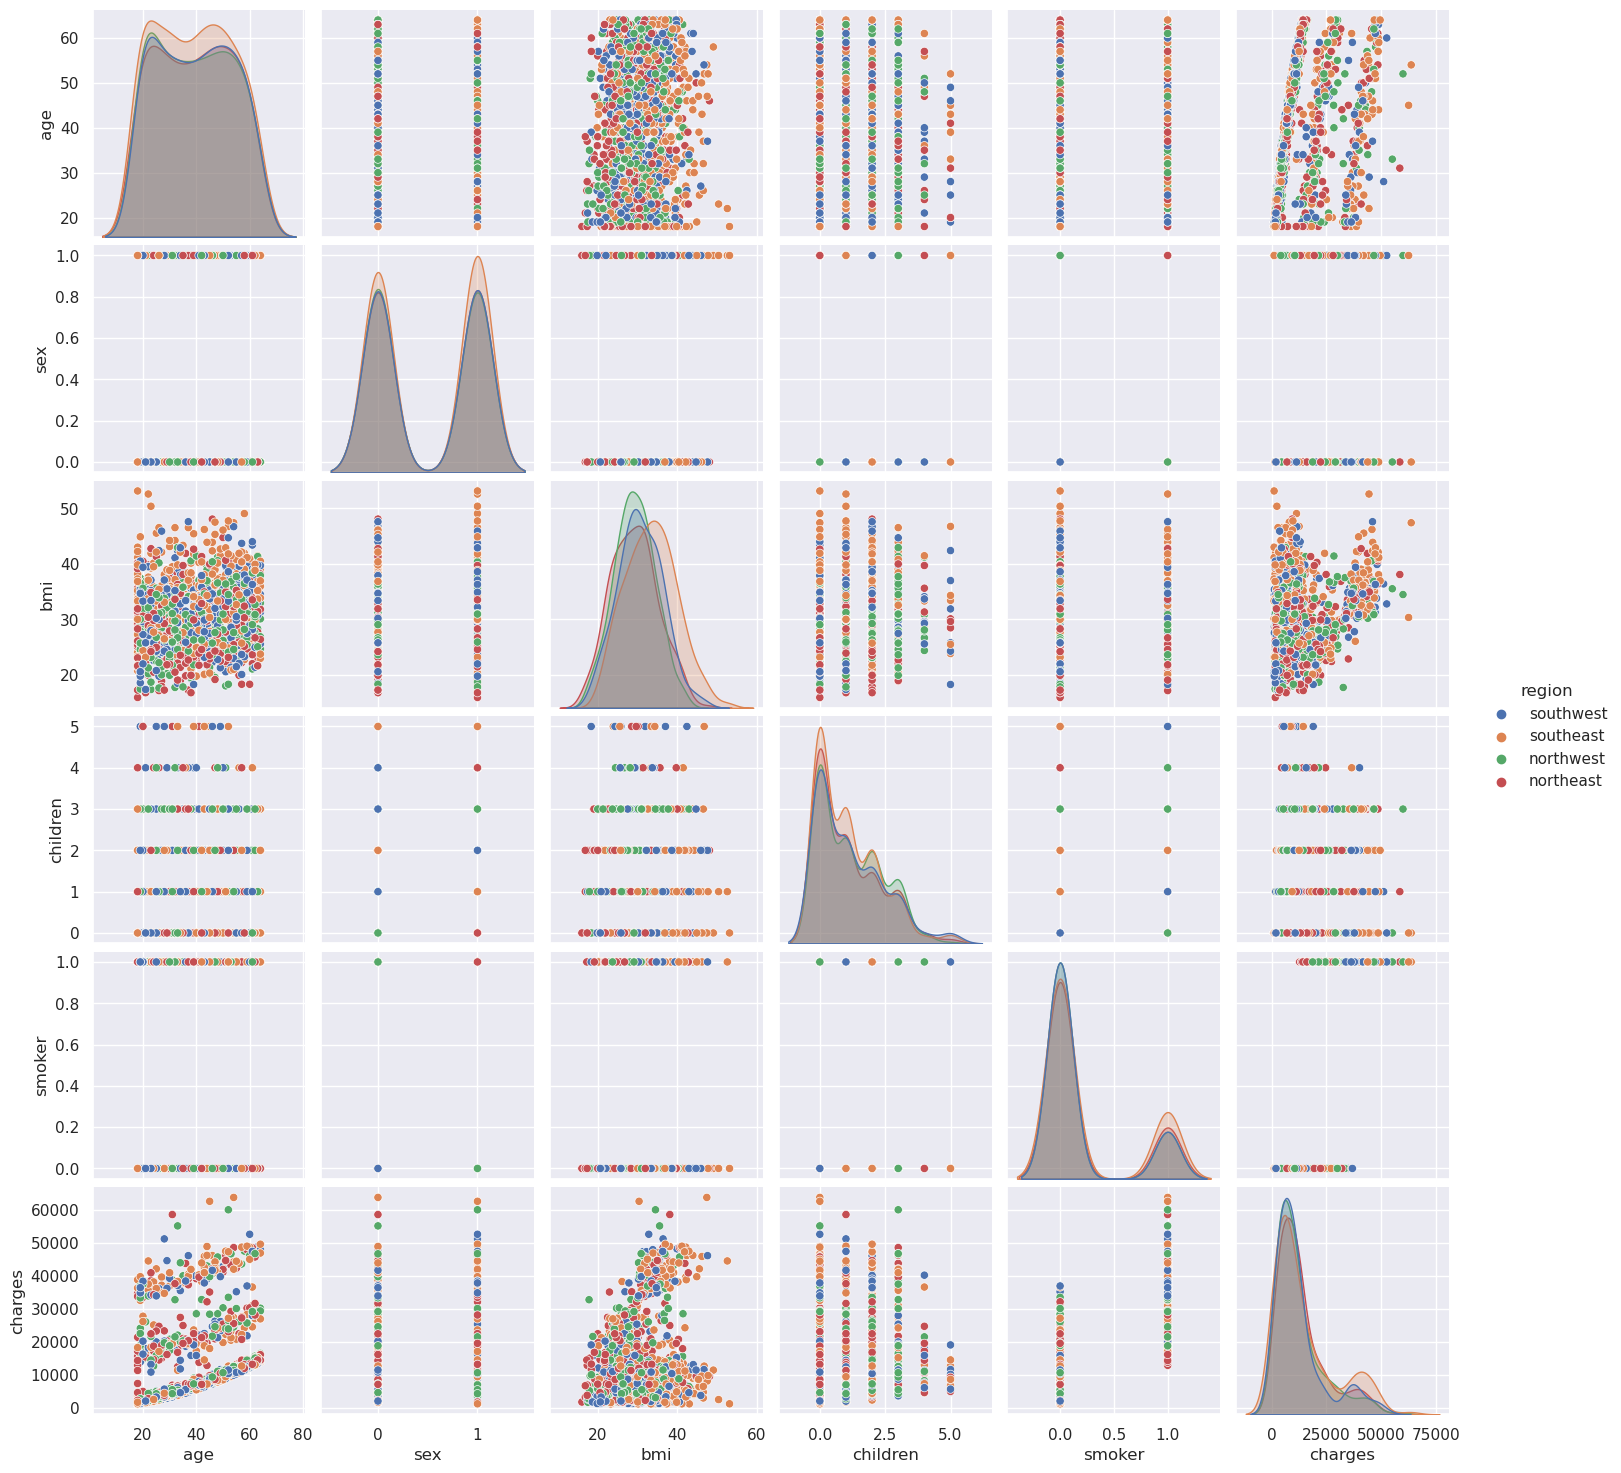

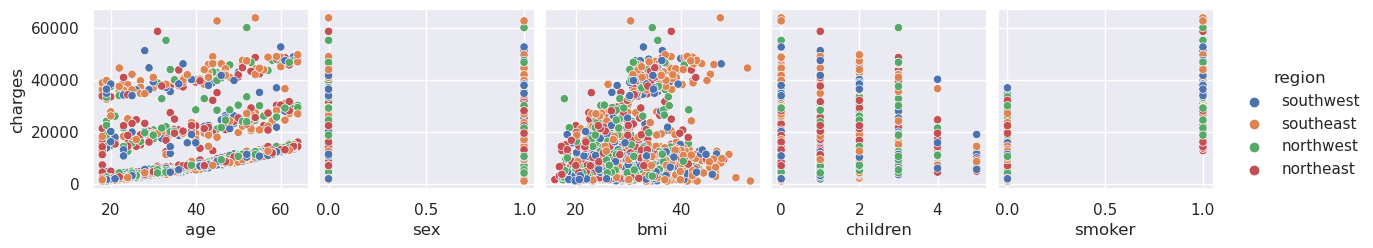

In [19]:
# use a plot to show all the relationship with multiple variables
df2['region'] = data["region"]
sns.pairplot(df2,hue='region')
sns.pairplot(df2,x_vars=['age','sex','bmi','children','smoker'],y_vars=['charges'],hue='region')

### 5. Using Multiple Linear Regression method to analysis the medical insurance data
5.1 using all the independent variables to build a initial multiple lenear regression

In [20]:
# one hot encoding method 
# to change the categorical variable 'region' to numerical dummies variables
df2 = pd.concat([df2,pd.get_dummies(data.region)],axis=1)
# clean up my dataframe again to make it clear
# data_new = dummy_df[['charges','age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest']]
df2

,age,sex,bmi,children,smoker,charges,region,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,southwest,0,0,0,1
1,18,1,33.770,1,0,1725.55230,southeast,0,0,1,0
2,28,1,33.000,3,0,4449.46200,southeast,0,0,1,0
3,33,1,22.705,0,0,21984.47061,northwest,0,1,0,0
4,32,1,28.880,0,0,3866.85520,northwest,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,northwest,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,northeast,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,southeast,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,southwest,0,0,0,1


In [21]:
# model 1 (all independent variables)
from sklearn.model_selection import train_test_split
from sklearn import metrics

# all independent variables except charges_log as X, and Profit is assigned to dependent variable y
X = df2[['age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest']].values
y = df2['charges'].values

# split the dataset to training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# testing purpose
# X_train.shape # 1070,9
# X_test.shape # 268,9
# y_train.shape #1070
# y_test.shape # 268

# create a initial linear regression model
model = LinearRegression(fit_intercept=True)
# train the model with X,y train values
model.fit(X_train,y_train)
# to make predictions on the test data.
y_predict = model.predict(X_test)
# compare the actual output values for X_test with the predicted values
dataframe = pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_predict.flatten()})
dataframe.head()

,Actual,Predicted
0,33750.29180,26926.149629
1,11743.93410,14131.569450
2,30063.58055,16215.790189
3,4296.27120,1968.924383
4,10791.96000,8878.061531


In [22]:
print(model.intercept_)
model.coef_

-12989.31149062789


array([  255.04037949,    82.73156019,   349.7293412 ,   562.1639394 ,
       23604.98645169,   592.37890743,   218.61532621,  -487.07004766,
        -323.92418599])

5.2 delete some variables (X) that are not main affect to the target y. 

In [23]:
# use Ordinear least square to check which variables are more relavent to the target
model = sm.OLS(y, X) 
OLS = model.fit()  
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:48:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           256.8564     11.899     21.587      0.000     233.514     280.199
x2          -131.3144    332.945     -0.394      0.693    -784.470     521.842
x3           339.1935     28.599     11.860      0.000     283.088     395.298
x4           475.5005    137.804      3.451      0.001     205.163     745.838
x5          2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
x6         -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
x7         -1.229e+04    988.196    -12.438      0.000   -1.42e+04   -1.04e+04
x8         -1.297e+04   1079.158    -12.022      0.000   -1.51e+04   -1.09e+04
x9          -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.3 evaluate the model using “MAE, MSE, and RMSE”

In [24]:
print("R2:",metrics.r2_score(y_test,y_predict))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test,y_predict))
mse = metrics.mean_squared_error(y_test,y_predict)
print("Mean Squared Error (MSE): ",mse)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error (RMSE):",RMSE)

# set a parameter table to compare the RMSE
results= pd.DataFrame()
results['name'] = ['method1']
results['RMSE'] = RMSE
results

R2: 0.7513732104274204
Mean Absolute Error (MAE): 4266.660594069969
Mean Squared Error (MSE):  38831708.22871713
Root Mean Squared Error (RMSE): 6231.509305835716


,name,RMSE
0,method1,6231.509306


In [25]:
# model 2 (nested method)
regression = LinearRegression(fit_intercept=True)
regions = data.region.unique()
rms = np.empty(regions.size)
mse = np.empty(regions.size)  # counties.size = 8

data_new2=df2[['age','bmi','children','smoker','region','charges']]
data_new2.region
regions
for i in range(regions.size):
    region = regions[i]
#     X = data_new2[['age','bmi','children','smoker','northeast','northwest','southeast','southwest']].values
#     y = data_new2.charges
    X = data_new2[['age','bmi','children','smoker']][data_new2.region == region].values
    y = data_new2.charges[data_new2.region == region]
    fit = regression.fit(X, y)
    predict = regression.predict(X)
    mse[i] = mean_squared_error(y, predict)
    rms[i] = sqrt(mse[i])
    print(rms[i])    
sqrt(mse.sum())

5343.550078607368
6254.546736254237
6010.949468251087
6059.6380799110175


11854.265455436243

In [26]:
md = smf.mixedlm("charges ~ bmi", data_new2, groups=data["region"])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: charges       
No. Observations: 1338    Method:             REML          
No. Groups:       4       Scale:              140915714.2957
Min. group size:  324     Log-Likelihood:     -14439.1521   
Max. group size:  364     Converged:          Yes           
Mean group size:  334.5                                     
------------------------------------------------------------
             Coef.   Std.Err.   z   P>|z|   [0.025   0.975] 
------------------------------------------------------------
Intercept   1218.432 1686.356 0.723 0.470 -2086.765 4523.630
bmi          392.965   53.764 7.309 0.000   287.589  498.341
Group Var  99802.812   36.400                               



In [27]:
predict = mdf.fittedvalues
dataframe = pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_predict.flatten()})
print(dataframe.head())
RMSE = sqrt(((y-predict)**2).mean())
results.loc[1] = ["method2", RMSE]
results

        Actual     Predicted
0  33750.29180  26926.149629
1  11743.93410  14131.569450
2  30063.58055  16215.790189
3   4296.27120   1968.924383
4  10791.96000   8878.061531


,name,RMSE
0,method1,6231.509306
1,method2,10951.836667


In [28]:
# method 3: use selected variables

# set indenpendent variables and target
X = df2[['age','bmi','children','smoker','northeast','northwest','southeast','southwest']].values
y = df2['charges']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# # fit the model
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
# evaluate the model
y_predict = model.predict(X_test)

# evaluate predictions
mae = metrics.mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

dataframe = pd.DataFrame({"Actual":y_test,"Predicted":y_predict.flatten()})
print(dataframe.head())

(1059, 8) (1059,)
MAE: 4058.641
          Actual     Predicted
559    1646.4297   4537.264472
1087  11353.2276  12982.895853
1020   8798.5930  12748.750800
460   10381.4787  13207.520724
802    2103.0800    672.406406


In [29]:
# testing
model = sm.OLS(y, X) 
OLS = model.fit()  
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:48:25   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           256.9736     11.891     21.610      0.000     233.646     280.301
x2           338.6646     28.559     11.858      0.000     282.639     394.690
x3           474.5665    137.740      3.445      0.001     204.355     744.778
x4          2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
x5         -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
x6         -1.234e+04    979.405    -12.602      0.000   -1.43e+04   -1.04e+04
x7         -1.302e+04   1071.021    -12.161      0.000   -1.51e+04   -1.09e+04
x8         -1.295e+04   1012.403    -12.791      0.000   -1.49e+04    -1.1e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print("R2:",metrics.r2_score(y_test,y_predict))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test,y_predict))
mse = metrics.mean_squared_error(y_test,y_predict)
print("Mean Squared Error (MSE): ",mse)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error (RMSE):",RMSE)

# set a parameter table to compare the RMSE
results.loc[2] = ["method3", RMSE]
results

R2: 0.7630289330916722
Mean Absolute Error (MAE): 4058.6407008208475
Mean Squared Error (MSE):  35375192.43717623
Root Mean Squared Error (RMSE): 5947.704804138839


,name,RMSE
0,method1,6231.509306
1,method2,10951.836667
2,method3,5947.704804
